In [5]:
### Análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Criação do modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Avaliação de métricas
from sklearn.metrics import accuracy_score

data = pd.read_csv("cancer.csv")
data.head() # imprimir 5 primeiros registros

,id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,1,3,3,7,1,1,3,1,2,1,1
1,2,4,3,5,1,1,2,2,3,1,1
2,3,4,3,5,1,1,2,1,2,1,1
3,4,6,2,4,1,1,2,2,1,1,1
4,5,4,3,1,1,1,2,2,4,1,1


In [6]:
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Separando dados
## Variáveis preditoras
X = data.loc[:,["age","menopause","tumor-size","inv-nodes","node-caps","deg-malig","breast","breast-quad","irradiat"]]
X = np.array(X)

## Variável alvo
y = data["class"]
y = np.array(y)

## Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(f"Tamanho X de treino: {X_train.shape}")
print(f"Tamanho X de teste: {X_test.shape}")
print(f"Tamanho y de treino: {y_train.shape}")
print(f"Tamanho y de teste: {y_test.shape}")

Tamanho X de treino: (221, 9)
Tamanho X de teste: (56, 9)
Tamanho y de treino: (221,)
Tamanho y de teste: (56,)


In [7]:
tree.fit(X_train, y_train)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
tree_predict = tree.predict(X_test)

knn_predict = knn.predict(X_test)

In [10]:
# Avaliação
tree_score = accuracy_score(y_test, tree_predict)
knn_score = accuracy_score(y_test, knn_predict)

print(f"Pontuação Decision Tree:{tree_score}")
print(f"Pontuação KNN:{knn_score}")

Pontuação Decision Tree:0.6607142857142857
Pontuação KNN:0.5892857142857143


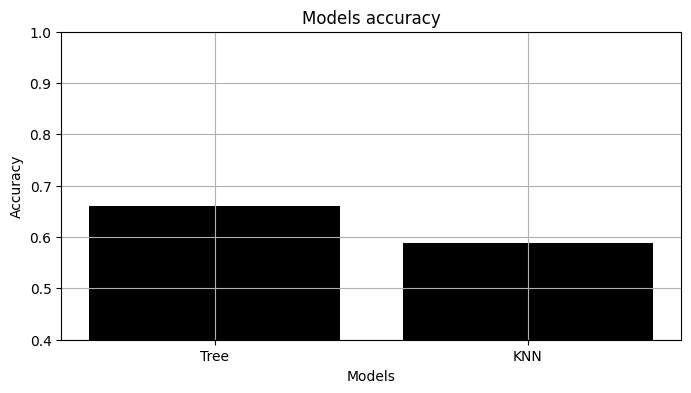

In [11]:
# Plotando resultados
plt.figure(figsize = (8,4))
plt.title("Models accuracy")
plt.bar(x = [0,1], height = [tree_score, knn_score], color = "black")
plt.xticks([0,1], ["Tree", "KNN"])
plt.ylim(0.4,1)
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.grid()
plt.show()

In [12]:
age = input("Age: ")
menopause = input("Menopause: ")
tumorSize = input("Tumor-size: ")
invNodes = input("Inv-nodes: ")
nodeCaps = input("Node-caps: ")
degMalig = input("Des-malig: ")
breast = input("Breast: ")
breastQuad = input("Breast-quad: ")
irradiat = input("Irradiat: ")

entry = [age, menopause, tumorSize, invNodes, nodeCaps, degMalig, breast, breastQuad, irradiat]
array = [entry]

resposta_tree_predict = tree.predict(array)
if resposta_tree_predict == 2:
    print("De acordo com a predição em árvore existem chances de recorrencia na doença. 😢")
elif resposta_tree_predict == 1:
    print("De acordo com a predição em árvore não existem chances de recorrencia na doença. 😁")


De acordo com a predição em árvore não existem chances de recorrencia na doença. 😁
